<a href="https://colab.research.google.com/github/rosehelfrich/Ky_School_data/blob/main/Summarize_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Column / Row options
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

# Two decimal places and the thousands separator
pd.options.display.float_format = '{:,.2f}'.format

# Reset float format
#pd.reset_option('display.float_format')

In [4]:
predict_df = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/predict_df.csv')

predict_df['End Year'] = predict_df['End Year'].astype(int)

In [5]:
predict_df[predict_df['School'].str.contains("Atherton")]

,End Year,District Code,District,School Code,School,Level,Proficiency Rate,Classification,Rating,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
537,2012,275,Jefferson County,275018,Atherton High,HS,60.00,Proficient,*Medium,"7,980.00","208,600.00",180.00,"8,153.00"
1718,2013,275,Jefferson County,275018,Atherton High,HS,66.00,Distinguished,*Medium,"8,180.00","343,700.00",280.00,"8,459.00"
2900,2014,275,Jefferson County,275018,Atherton High,HS,77.00,Distinguished,*Medium,"8,230.00","422,100.00",340.00,"8,574.00"
4100,2015,275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,*Medium,"7,870.00","473,600.00",360.00,"8,231.00"
5301,2016,275,Jefferson County,275018,Atherton High,HS,83.00,Distinguished,*High,"10,920.00","801,700.00",600.00,"11,514.00"
6508,2017,275,Jefferson County,275018,Atherton High,HS,76.00,*Distinguished,*Medium,"11,930.00","832,300.00",580.00,"12,513.00"
7733,2018,275,Jefferson County,275018,Atherton High,HS,79.00,*Distinguished,*High,"13,970.00","850,400.00",600.00,"14,563.00"
8976,2019,275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,Very High,"14,130.00","572,600.00",400.00,"14,535.00"
10231,2022,275,Jefferson County,275018,Atherton High,HS,73.00,*Distinguished,High,"10,401.25","563,125.00",417.50,"10,817.75"


In [6]:
# Excluding the 2022 year so we can get the pre-covid trend. 

#trends_df = predict_df[predict_df['End Year'] != 2022]
#trends_df.reset_index(drop= True, inplace= True)

In [7]:
predict_df[predict_df['School'] == 'Atherton High']

,End Year,District Code,District,School Code,School,Level,Proficiency Rate,Classification,Rating,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
537,2012,275,Jefferson County,275018,Atherton High,HS,60.00,Proficient,*Medium,"7,980.00","208,600.00",180.00,"8,153.00"
1718,2013,275,Jefferson County,275018,Atherton High,HS,66.00,Distinguished,*Medium,"8,180.00","343,700.00",280.00,"8,459.00"
2900,2014,275,Jefferson County,275018,Atherton High,HS,77.00,Distinguished,*Medium,"8,230.00","422,100.00",340.00,"8,574.00"
4100,2015,275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,*Medium,"7,870.00","473,600.00",360.00,"8,231.00"
5301,2016,275,Jefferson County,275018,Atherton High,HS,83.00,Distinguished,*High,"10,920.00","801,700.00",600.00,"11,514.00"
6508,2017,275,Jefferson County,275018,Atherton High,HS,76.00,*Distinguished,*Medium,"11,930.00","832,300.00",580.00,"12,513.00"
7733,2018,275,Jefferson County,275018,Atherton High,HS,79.00,*Distinguished,*High,"13,970.00","850,400.00",600.00,"14,563.00"
8976,2019,275,Jefferson County,275018,Atherton High,HS,80.00,Distinguished,Very High,"14,130.00","572,600.00",400.00,"14,535.00"
10231,2022,275,Jefferson County,275018,Atherton High,HS,73.00,*Distinguished,High,"10,401.25","563,125.00",417.50,"10,817.75"


In [8]:
predict_df[predict_df['School'] == 'Fern Creek High']

,End Year,District Code,District,School Code,School,Level,Proficiency Rate,Classification,Rating,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
533,2012,275,Jefferson County,275012,Fern Creek High,HS,50.00,Needs Improvement,*Very Low,"8,250.00","-451,400.00",-340.00,"7,914.00"
1714,2013,275,Jefferson County,275012,Fern Creek High,HS,56.00,Needs Improvement,*Low,"8,220.00","-328,600.00",-240.00,"7,977.00"
2896,2014,275,Jefferson County,275012,Fern Creek High,HS,71.00,Proficient,*Medium,"8,270.00","-300,000.00",-220.00,"8,052.00"
4096,2015,275,Jefferson County,275012,Fern Creek High,HS,72.00,Proficient,*Medium,"8,020.00","-304,800.00",-200.00,"7,819.00"
5297,2016,275,Jefferson County,275012,Fern Creek High,HS,74.00,Proficient,*Medium,"11,240.00","-213,300.00",-140.00,"11,100.00"
6504,2017,275,Jefferson County,275012,Fern Creek High,HS,61.00,*Needs Improvement,*Low,"12,110.00","-196,200.00",-130.00,"11,980.00"
7729,2018,275,Jefferson County,275012,Fern Creek High,HS,41.00,*Needs Improvement,*Very Low,"13,690.00","-229,800.00",-140.00,"13,548.00"
8972,2019,275,Jefferson County,275012,Fern Creek High,HS,40.00,Needs Improvement,Very Low,"13,450.00","-274,900.00",-160.00,"13,284.00"
10227,2022,275,Jefferson County,275012,Fern Creek High,HS,44.00,*Needs Improvement,Low,"10,406.25","-287,375.00",-196.25,"10,209.25"


# Summarize School Data

## Avg Spending

In [9]:
school_spending = predict_df.groupby(['School Code', 'Level']).mean().loc[:,['Reported Spending per student', 
                                                                    'Money Difference per school',
                                                                    'Money Difference per student', 
                                                                    'Estimated Spending per student']]

#school_spending.dropna(inplace=True) # Drops 13 schools

In [10]:
school_spending

,,Reported Spending per student,Money Difference per school,Money Difference per student,Estimated Spending per student
School Code,Level,,,,
1010,HS,"9,355.00","-12,787.50",-17.50,"9,336.62"
1014,MS,"8,621.25","-8,212.50",-21.25,"8,598.88"
1016,ES,"9,621.25",637.50,0.00,"9,622.62"
1020,ES,"12,950.00","22,300.00",40.00,"12,993.50"
5010,ES,"11,740.00","134,762.50",147.50,"11,886.50"
...,...,...,...,...,...
601090,ES,"10,847.50","115,625.00",247.50,"11,094.25"
601120,ES,"12,173.75","47,887.50",151.25,"12,324.50"
606450,ES,NaN,NaN,NaN,NaN


In [11]:
school_spending.columns =  ['Reported Spending based on district teacher experience', # Mandated reported average per student per year based on average teacher experience throughout the entire district
                            'Money Difference per school', # average per year
                            'Money Difference per student', # average per student per year
                            'Estimated Spending based on school teacher experience'] #  average per student per year

In [12]:
school_spending

,,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience
School Code,Level,,,,
1010,HS,"9,355.00","-12,787.50",-17.50,"9,336.62"
1014,MS,"8,621.25","-8,212.50",-21.25,"8,598.88"
1016,ES,"9,621.25",637.50,0.00,"9,622.62"
1020,ES,"12,950.00","22,300.00",40.00,"12,993.50"
5010,ES,"11,740.00","134,762.50",147.50,"11,886.50"
...,...,...,...,...,...
601090,ES,"10,847.50","115,625.00",247.50,"11,094.25"
601120,ES,"12,173.75","47,887.50",151.25,"12,324.50"
606450,ES,NaN,NaN,NaN,NaN


## AST Proficency with pivot table

In [13]:
pivot_df = predict_df.pivot(index=['School Code', 'Level'], columns='End Year', values='Proficiency Rate')

In [14]:
pivot_df

,End Year,2012,2013,2014,2015,2016,2017,2018,2019,2022
School Code,Level,,,,,,,,,
1010,HS,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00
1014,MS,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00
1016,ES,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00
1020,ES,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00
5010,ES,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00
...,...,...,...,...,...,...,...,...,...,...
601090,ES,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00
601120,ES,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00
606450,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00


In [15]:
# We want the pre-covid classifcation, not the post covid classfication

school_summary = predict_df.sort_values(by='End Year', ascending=False).loc[:,['District', 'School Code', 'Level', 'School', 'Classification', 'Rating']]

school_summary.drop_duplicates(subset=['School Code', 'Level'], inplace=True)

#Set index to school code
school_summary.set_index(['School Code', 'Level'], inplace=True)

# Rename classification column to be more accurate
school_summary.columns = ['District', 'School', 'Classification', 'Rating']

In [16]:
# Join school summary data with the pivot_df

school_summary = school_summary.join(pivot_df, how='outer')

In [17]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1287 entries, (1010, 'HS') to (606460, 'MS')
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        1287 non-null   object 
 1   School          1287 non-null   object 
 2   Classification  1266 non-null   object 
 3   Rating          1287 non-null   object 
 4   2012            1180 non-null   float64
 5   2013            1183 non-null   float64
 6   2014            1191 non-null   float64
 7   2015            1200 non-null   float64
 8   2016            1204 non-null   float64
 9   2017            1212 non-null   float64
 10  2018            1239 non-null   float64
 11  2019            1247 non-null   float64
 12  2022            1266 non-null   float64
dtypes: float64(9), object(4)
memory usage: 176.0+ KB


In [18]:
school_summary

,,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022
School Code,Level,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00
601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00
606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00


## Add type, title 1 status & locations

In [19]:
# Join with the school spending data. 
school_summary = school_summary.join(school_spending, how='outer')

In [20]:
# Drops the rows where 5 or more values are not missing
#school_summary.dropna(axis=0, thresh=5, inplace=True) # This drops 13 schools

In [21]:
# Add in school locations
school_locations = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_locations_2022.csv')

school_info = school_locations.loc[:,['School Code', 'Level', 'Title I Status', 'Latitude', 'Longitude']]

school_info.set_index(['School Code', 'Level'], inplace=True)

In [22]:
school_summary = school_summary.join(school_info, how='left')

In [23]:
school_summary

,,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,Level,,,,,,,,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,355.00","-12,787.50",-17.50,"9,336.62",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,621.25","-8,212.50",-21.25,"8,598.88",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,621.25",637.50,0.00,"9,622.62",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,993.50",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,762.50",147.50,"11,886.50",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,847.50","115,625.00",247.50,"11,094.25",Title 1 Eligible - Schoolwide School,38.04,-84.71
601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,173.75","47,887.50",151.25,"12,324.50",Title 1 Eligible - Schoolwide School,38.15,-84.68
606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30


## Correlations

In [24]:
# Converts & rounds to integers
def round_df_to_float(df, column_list):
  for column in column_list:
    df[column] = pd.to_numeric(df[column], errors='ignore')
    df = df.round({column:-1})
  return(df)

In [25]:
col_school = ['Reported Spending based on district teacher experience',
              'Money Difference per school', 
              'Money Difference per student', 
              'Estimated Spending based on school teacher experience']

In [26]:
school_summary = round_df_to_float(school_summary, col_school)

In [27]:
school_summary

,,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,Level,,,,,,,,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71
601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68
606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30


In [28]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1287 entries, (1010, 'HS') to (606460, 'MS')
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   District                                                1287 non-null   object 
 1   School                                                  1287 non-null   object 
 2   Classification                                          1266 non-null   object 
 3   Rating                                                  1287 non-null   object 
 4   2012                                                    1180 non-null   float64
 5   2013                                                    1183 non-null   float64
 6   2014                                                    1191 non-null   float64
 7   2015                                                    1200 non-null   float64
 8   2016             

In [29]:
school_summary.nunique()

District                                                   172
School                                                    1121
Classification                                               6
Rating                                                       9
2012                                                        58
2013                                                        53
2014                                                        49
2015                                                        45
2016                                                        52
2017                                                        72
2018                                                        84
2019                                                        84
2022                                                        84
Reported Spending based on district teacher experience     556
Money Difference per school                               1105
Money Difference per student                           

In [30]:
school_summary.corr()

,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Latitude,Longitude
2012,1.00,0.78,0.70,0.63,0.48,0.62,0.60,0.59,0.63,-0.26,0.31,0.27,-0.23,-0.00,-0.12
2013,0.78,1.00,0.79,0.75,0.60,0.62,0.56,0.54,0.64,-0.23,0.32,0.27,-0.21,-0.07,-0.06
2014,0.70,0.79,1.00,0.78,0.61,0.60,0.52,0.48,0.59,-0.21,0.30,0.25,-0.20,-0.07,-0.07
2015,0.63,0.75,0.78,1.00,0.66,0.62,0.48,0.42,0.59,-0.22,0.35,0.30,-0.20,-0.08,-0.06
2016,0.48,0.60,0.61,0.66,1.00,0.66,0.52,0.45,0.58,-0.14,0.30,0.26,-0.12,-0.12,0.03
2017,0.62,0.62,0.60,0.62,0.66,1.00,0.87,0.82,0.73,-0.27,0.32,0.32,-0.25,-0.09,0.04
2018,0.60,0.56,0.52,0.48,0.52,0.87,1.00,0.93,0.75,-0.26,0.29,0.29,-0.24,-0.10,0.04
2019,0.59,0.54,0.48,0.42,0.45,0.82,0.93,1.00,0.76,-0.26,0.26,0.26,-0.24,-0.11,0.03
2022,0.63,0.64,0.59,0.59,0.58,0.73,0.75,0.76,1.00,-0.29,0.27,0.26,-0.27,-0.09,-0.01
Reported Spending based on district teacher experience,-0.26,-0.23,-0.21,-0.22,-0.14,-0.27,-0.26,-0.26,-0.29,1.00,-0.15,-0.15,0.99,0.03,0.05


<Axes: >

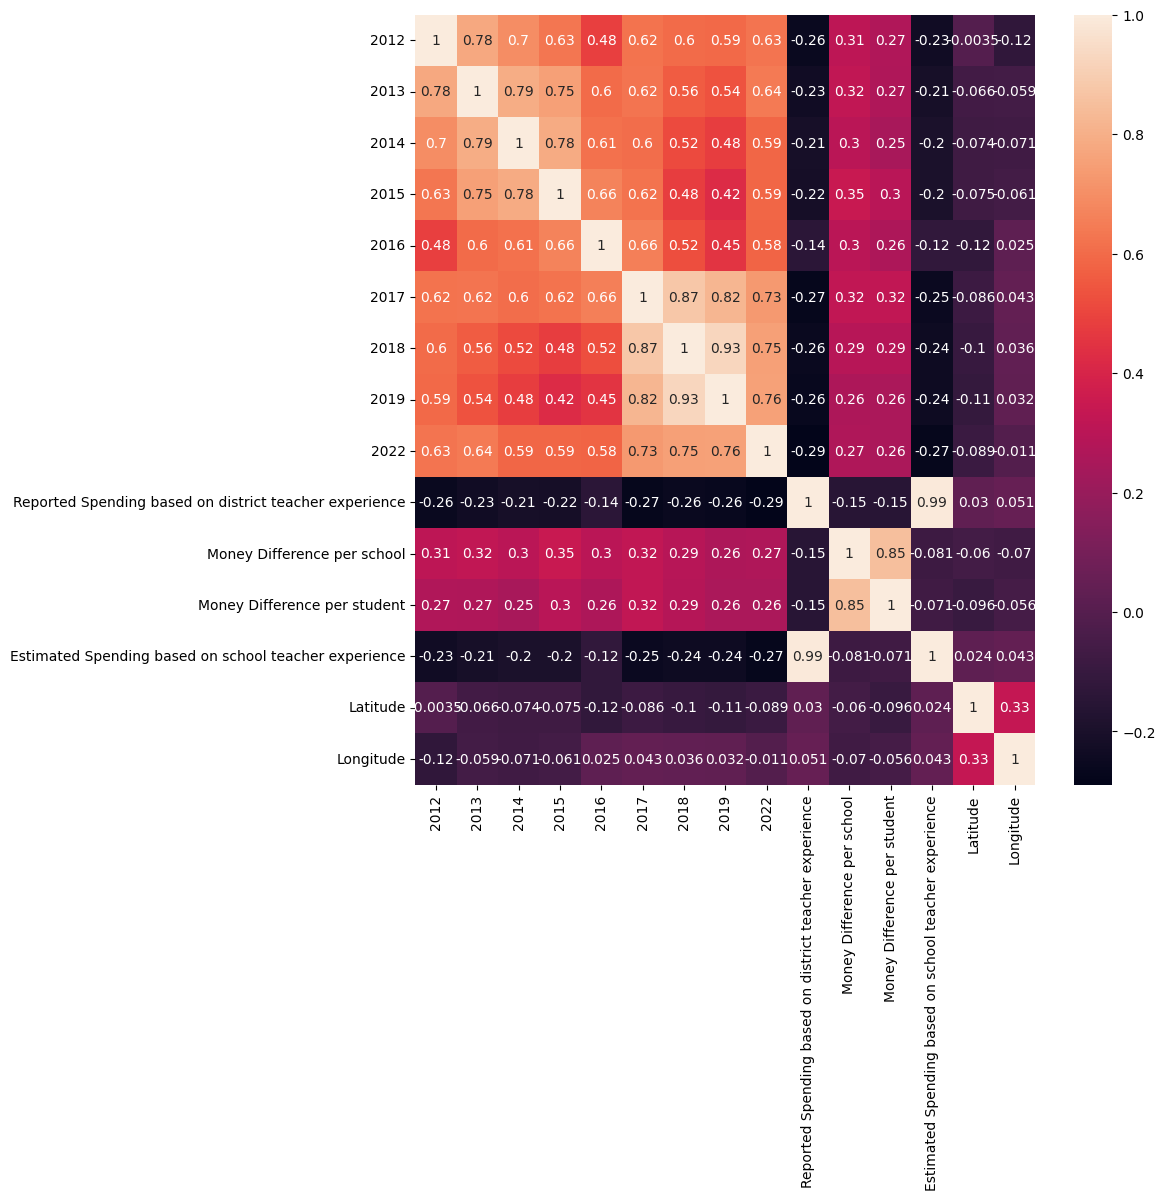

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(school_summary.corr(), annot=True)

In [32]:
pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_summary.csv')

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71
1283,601120,ES,Woodford County,Northside Elementary School,*Proficient,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68
1284,606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30
1285,606460,HS,Model Laboratory Schools at EKU,Model High School,Distinguished,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30


## KY AST Goals

In [33]:
raw_goals_october_2022 = pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/2021-2022/progress_towards_state_goals_proficiency_2022.csv')

goals_oct_2022 = raw_goals_october_2022.loc[:,['SCHOOL CODE', 'LEVEL', 
                                               'GOAL PERFORMANCE 2022', 'GOAL PERFORMANCE 2023', 'GOAL PERFORMANCE 2024', 
                                               'GOAL PERFORMANCE 2025', 'GOAL PERFORMANCE 2026', 'GOAL PERFORMANCE 2027',
                                               'GOAL PERFORMANCE 2028', 'GOAL PERFORMANCE 2029', 'GOAL PERFORMANCE 2030']]

goals_oct_2022.columns = ['School Code', 'Level', 
                          '2022 Goal', '2023 Goal', '2024 Goal', 
                          '2025 Goal', '2026 Goal', '2027 Goal',
                          '2028 Goal', '2029 Goal', '2030 Goal']

goals_oct_2022 = goals_oct_2022.groupby(['School Code', 'Level']).mean()

In [34]:
# Converts & rounds to integers

def round_df_to_integer(df, column_list):
  for column in column_list:
    #df[column] = pd.to_numeric(df[column])
    df = df.round({column:0})
    df[column] = df[column].astype(int)
  return(df)

In [35]:
# Execute integers conversion/ round
goal_columns = ['2022 Goal', '2023 Goal', '2024 Goal', 
                '2025 Goal', '2026 Goal', '2027 Goal', 
                '2028 Goal', '2029 Goal', '2030 Goal']

goals_oct_2022 = round_df_to_integer(goals_oct_2022, goal_columns)

In [36]:
goals_oct_2022

,,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal
School Code,Level,,,,,,,,,
1010,HS,41,44,46,49,52,55,58,61,63
1014,MS,45,47,50,52,55,58,60,63,66
1016,ES,48,50,53,55,58,60,63,65,68
5010,ES,47,49,52,54,57,60,62,65,67
5015,MS,45,47,50,53,55,58,61,63,66
...,...,...,...,...,...,...,...,...,...,...
601090,ES,56,58,61,63,65,67,69,71,73
601120,ES,58,60,62,64,66,68,70,72,74
606450,ES,46,48,50,52,54,57,59,61,63


In [37]:
goals_oct_2022.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1247 entries, (1010, 'HS') to (606460, 'MS')
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   2022 Goal  1247 non-null   int64
 1   2023 Goal  1247 non-null   int64
 2   2024 Goal  1247 non-null   int64
 3   2025 Goal  1247 non-null   int64
 4   2026 Goal  1247 non-null   int64
 5   2027 Goal  1247 non-null   int64
 6   2028 Goal  1247 non-null   int64
 7   2029 Goal  1247 non-null   int64
 8   2030 Goal  1247 non-null   int64
dtypes: int64(9)
memory usage: 100.3+ KB


In [38]:
school_summary.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/school_summary.csv')

In [39]:
school_summary

,,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude
School Code,Level,,,,,,,,,,,,,,,,,,,,
1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32
1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33
5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71
601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68
606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30


## Slope and Intercept

In [40]:
df_slope = school_summary.copy()
df_school_details = df_slope.join(goals_oct_2022, how='left')
df_school_details.sort_index(inplace=True)
df_school_details.reset_index(drop=False, inplace=True)

In [41]:
df_school_details.iloc[:, 6:14].values[0]

array([55., 54., 69., 71., 72., 60., 57., 58.])

In [42]:
school_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1287 entries, (1010, 'HS') to (606460, 'MS')
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   District                                                1287 non-null   object 
 1   School                                                  1287 non-null   object 
 2   Classification                                          1266 non-null   object 
 3   Rating                                                  1287 non-null   object 
 4   2012                                                    1180 non-null   float64
 5   2013                                                    1183 non-null   float64
 6   2014                                                    1191 non-null   float64
 7   2015                                                    1200 non-null   float64
 8   2016             

In [43]:
df_school_details.index

RangeIndex(start=0, stop=1287, step=1)

In [44]:
# Find the slope, intercept for each school based on pre-covid data
slopes = []
intercepts = []  

for i in df_school_details.index:
  x_values = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_values = df_school_details.loc[:, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values[i]
  slope, init_intercept = np.polyfit(x_values, y_values, 1)
  score_2022 = df_school_details[2022][i]
  intercept = score_2022 - (slope * 2022) 
   
  slopes.append(slope)
  intercepts.append(intercept)

# Put slopes, intercepts into school_summary
df_school_details['Proficiency slope'] = slopes
df_school_details['Proficiency intercept'] = intercepts

In [45]:
df_school_details[df_school_details['Proficiency slope'] < 0]

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
6,5020,HS,Allen County,Allen County-Scottsville High School,*Needs Improvement,Medium,51.00,61.00,72.00,68.00,72.00,62.00,57.00,56.00,61.00,"12,840.00","122,800.00",140.00,"12,980.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,39.00,42.00,45.00,48.00,50.00,53.00,56.00,59.00,62.00,-0.13,325.79
10,11020,HS,Anderson County,Anderson County High School,*Needs Improvement,High,60.00,61.00,69.00,74.00,75.00,65.00,56.00,62.00,68.00,"8,380.00","-61,800.00",-60.00,"8,320.00",Title 1 Eligible - No Program,38.02,-84.91,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,-0.26,597.57
23,13011,HS,Augusta Independent,Augusta Independent School,*Needs Improvement,Low,58.00,54.00,70.00,76.00,74.00,68.00,57.00,51.00,41.00,"10,850.00","13,200.00",50.00,"10,900.00",Title 1 Eligible - Schoolwide School,38.77,-84.00,37.00,40.00,43.00,46.00,49.00,52.00,55.00,58.00,61.00,-0.50,"1,052.00"
55,31040,HS,Bell County,Bell County High School,*Needs Improvement,Medium,51.00,58.00,69.00,70.00,75.00,69.00,56.00,50.00,61.00,"9,820.00","12,620.00",20.00,"9,840.00",Title 1 Eligible - No Program,36.71,-83.69,38.00,41.00,44.00,47.00,50.00,53.00,56.00,59.00,62.00,-0.14,349.86
79,35020,MS,Boone County,Rector A. Jones Middle School,*Needs Improvement,Low,47.00,48.00,58.00,57.00,60.00,52.00,49.00,48.00,38.00,"8,850.00","-147,180.00",-210.00,"8,640.00",Title 1 Eligible - Schoolwide School,38.99,-84.62,22.00,26.00,30.00,33.00,37.00,41.00,45.00,48.00,52.00,-0.04,110.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,575074,HS,Washington County,Washington County High School,*Needs Improvement,Medium,49.00,62.00,68.00,70.00,71.00,45.00,54.00,46.00,62.00,"9,710.00","10,140.00",20.00,"9,730.00",Title 1 Eligible - Schoolwide School,37.71,-85.21,34.00,37.00,40.00,43.00,46.00,50.00,53.00,56.00,59.00,-1.54,"3,167.21"
1247,581200,HS,Wayne County,Wayne County High School,*Needs Improvement,Low,58.00,70.00,74.00,76.00,70.00,60.00,61.00,52.00,51.00,"9,020.00","-1,290.00",-10.00,"9,020.00",Title 1 Eligible - No Program,36.83,-84.87,39.00,42.00,45.00,48.00,51.00,54.00,57.00,60.00,62.00,-1.61,"3,300.64"
1266,591430,HS,Whitley County,Whitley County High School,*Needs Improvement,Medium,52.00,65.00,72.00,74.00,77.00,64.00,58.00,57.00,59.00,"10,010.00","-108,950.00",-100.00,"9,900.00",Title 1 Eligible - Schoolwide School,36.78,-84.15,45.00,48.00,51.00,53.00,56.00,58.00,61.00,64.00,66.00,-0.25,564.50
1273,593030,HS,Williamstown Independent,Williamstown Sr. High,*Needs Improvement,High,67.00,68.00,72.00,75.00,71.00,69.00,77.00,57.00,68.00,"9,290.00","48,310.00",210.00,"9,500.00",Title 1 Eligible - No Program,38.65,-84.57,50.00,53.00,55.00,57.00,60.00,62.00,65.00,67.00,69.00,-0.45,982.71


In [46]:
df_school_details

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,905.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"
1283,601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,74.00,2.12,"-4,215.71"
1284,606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30,46.00,48.00,50.00,52.00,54.00,57.00,59.00,61.00,63.00,NaN,NaN
1285,606460,HS,Model Laboratory Schools at EKU,Model High School,Distinguished,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30,54.00,56.00,58.00,60.00,62.00,63.00,65.00,67.00,68.00,NaN,NaN


In [47]:
df_school_details.to_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/detailed_df_by_school.csv', index=False)

In [48]:
pd.read_csv('/content/drive/MyDrive/Colab Data/KY EPSB/All Years/detailed_df_by_school.csv')

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,905.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"
1283,601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,74.00,2.12,"-4,215.71"
1284,606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30,46.00,48.00,50.00,52.00,54.00,57.00,59.00,61.00,63.00,NaN,NaN
1285,606460,HS,Model Laboratory Schools at EKU,Model High School,Distinguished,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30,54.00,56.00,58.00,60.00,62.00,63.00,65.00,67.00,68.00,NaN,NaN


In [49]:
df_school_details

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
1,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
2,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5010,ES,Allen County,Allen County Primary Center,*Needs Improvement,Low,50.00,59.00,70.00,68.00,71.00,76.00,75.00,65.00,53.00,"11,740.00","134,760.00",150.00,"11,890.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,47.00,49.00,52.00,54.00,57.00,60.00,62.00,65.00,67.00,2.45,"-4,905.71"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"
1283,601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,74.00,2.12,"-4,215.71"
1284,606450,ES,Model Laboratory Schools at EKU,Model Elementary,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30,46.00,48.00,50.00,52.00,54.00,57.00,59.00,61.00,63.00,NaN,NaN
1285,606460,HS,Model Laboratory Schools at EKU,Model High School,Distinguished,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.00,NaN,NaN,NaN,NaN,Not a Title 1 School,37.74,-84.30,54.00,56.00,58.00,60.00,62.00,63.00,65.00,67.00,68.00,NaN,NaN


In [50]:
df_school_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   School Code                                             1287 non-null   int64  
 1   Level                                                   1287 non-null   object 
 2   District                                                1287 non-null   object 
 3   School                                                  1287 non-null   object 
 4   Classification                                          1266 non-null   object 
 5   Rating                                                  1287 non-null   object 
 6   2012                                                    1180 non-null   float64
 7   2013                                                    1183 non-null   float64
 8   2014                                  

In [51]:
df_school_details.describe()

,School Code,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
count,"1,287.00","1,180.00","1,183.00","1,191.00","1,200.00","1,204.00","1,212.00","1,239.00","1,247.00","1,266.00","1,262.00","1,262.00","1,262.00","1,262.00","1,143.00","1,143.00","1,246.00","1,246.00","1,246.00","1,246.00","1,246.00","1,246.00","1,246.00","1,246.00","1,246.00","1,161.00","1,158.00"
mean,"288,365.08",56.27,58.31,68.45,68.34,70.01,69.71,69.56,68.80,58.16,"10,618.65","22,022.77",39.98,"10,634.92",37.77,-85.17,46.17,48.72,51.27,53.81,56.39,58.93,61.48,64.03,66.61,1.76,"-3,487.61"
std,"165,513.10",9.27,8.54,7.85,7.52,9.09,13.39,13.95,14.64,14.78,"1,999.03","106,482.57",168.51,"1,992.23",0.64,1.53,12.63,12.04,11.43,10.85,10.27,9.66,9.08,8.49,7.90,1.90,"3,844.18"
min,"1,010.00",28.00,28.00,34.00,42.00,37.00,20.00,18.00,14.00,10.00,"6,270.00","-500,660.00",-660.00,"6,360.00",36.51,-89.16,9.00,14.00,18.00,22.00,27.00,31.00,35.00,40.00,44.00,-5.29,"-15,477.14"
25%,"165,006.00",50.00,53.00,64.00,63.00,64.00,61.00,61.00,60.00,48.00,"9,320.00","-11,220.00",-30.00,"9,342.50",37.20,-85.89,38.00,41.00,44.00,47.00,50.00,53.00,56.00,59.00,62.00,0.45,"-6,105.80"
50%,"275,116.00",56.00,58.00,69.00,68.00,71.00,69.00,70.00,70.00,58.00,"10,285.00","20,490.00",50.00,"10,300.00",37.81,-84.91,46.00,49.00,51.00,54.00,56.00,59.00,61.00,64.00,67.00,1.90,"-3,781.93"
75%,"441,034.00",62.00,64.00,74.00,74.00,76.00,79.00,79.00,79.00,68.00,"11,537.50","57,280.00",120.00,"11,595.00",38.21,-84.26,55.00,57.00,59.00,61.00,63.00,65.00,68.00,70.00,72.00,3.05,-886.71
max,"606,460.00",92.00,87.00,92.00,92.00,94.00,100.00,111.00,109.00,101.00,"24,090.00","1,037,600.00","1,100.00","24,150.00",39.12,-82.18,88.00,89.00,89.00,90.00,90.00,91.00,91.00,92.00,93.00,7.69,"10,716.71"


# School Graphs

In [52]:
#df_school_details.dropna(inplace=True)
df_school_details.sort_values(by=['District', 'School', 'Level'], inplace=True)
df_school_details.reset_index(drop=True, inplace=True)

In [53]:
def test_trend(school_index):
  x_trend = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_trend = df_school_details.loc[school_index, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values
  sns.regplot(x = x_trend, y = y_trend, fit_reg=True, ci=None)
  
  # 2022 Test score
  x_score_2022 = [2022]
  y_score_2022 = df_school_details.loc[school_index,2022]
  plt.scatter(x_score_2022, y_score_2022)

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2012, 2023)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Trend"%district))
  plt.gca().legend(('Pre-covid Test Trend','Test scores'), loc='best')
  plt.show()

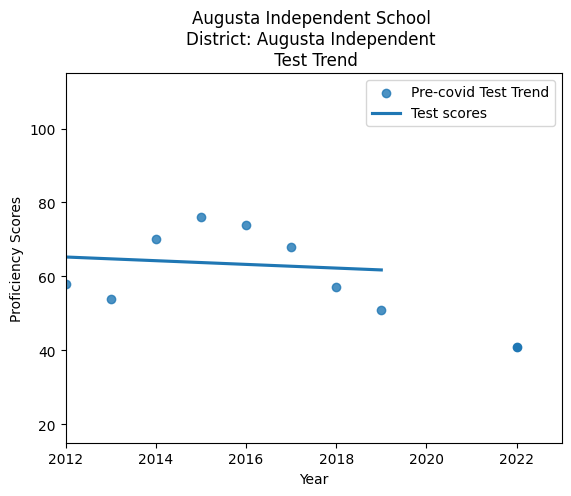

In [54]:
test_trend(23)

In [55]:
def test_scores(school_index):
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.loc[school_index,[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]].values
  #y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores, marker="D")

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2011, 2023)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Scores"%district))
  plt.gca().legend(('Test Scores',), loc='best')
  plt.show()

In [56]:
df_school_details.iloc[54,4:13]

Classification    *Needs Improvement
Rating                           Low
2012                           60.00
2013                           51.00
2014                           54.00
2015                           51.00
2016                           71.00
2017                           68.00
2018                           67.00
Name: 54, dtype: object

In [57]:
df_school_details.index

RangeIndex(start=0, stop=1287, step=1)

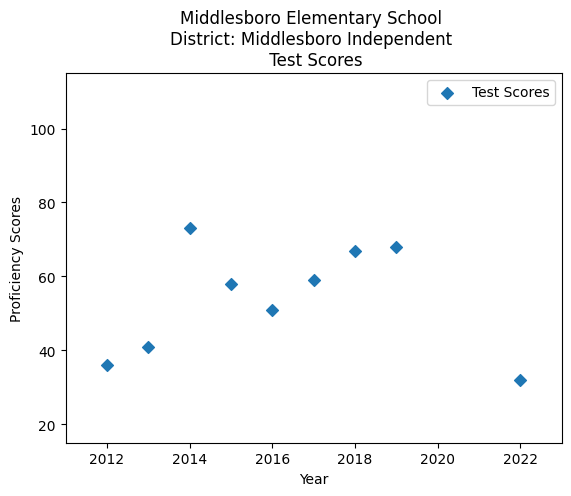

In [58]:
test_scores(949)

In [59]:
def score_predictions(school_index):
  x_pred = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  slope = df_school_details.at[school_index, 'Proficiency slope']
  intercept = df_school_details.at[school_index, 'Proficiency intercept']
  y_pred = [slope * year + intercept for year in x_pred]
  plt.plot(x_pred, y_pred, linestyle='dashed')
  
  # 2022 Test score
  x_score_2022 = [2022]
  y_score_2022 = df_school_details.loc[school_index, [2022]].values
  plt.scatter(x_score_2022, y_score_2022, marker="D")


  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']
  plt.xlim(2021, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Predictions \n (Based on school trend and 2022 test score)"%district))
  plt.gca().legend(('Predictions',), loc='best')
  plt.show()

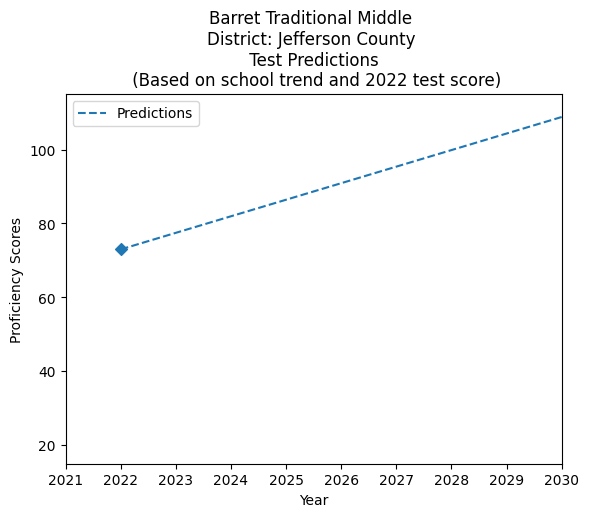

In [60]:
score_predictions(580)

In [61]:
def school_goals(school_index):
  # Test Scores - scatter
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.loc[[school_index],[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]].values
  #y_scores = df_school_details.iloc[[school_index],4:13].values[0]
  plt.scatter(x_scores, y_scores)
  
  # School Goals
  x_goals = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  y_goals = df_school_details.loc[[school_index],['2022 Goal','2023 Goal','2024 Goal','2025 Goal','2026 Goal','2027 Goal','2028 Goal','2029 Goal','2030 Goal']].values
  #y_goals = df_school_details.iloc[[school_index],20:30].values[0]
  plt.scatter(x_goals, y_goals, marker="x")

  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']

  plt.xlim(2012, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Scores and Goals"%district))
  plt.gca().legend(('Test Scores', 'School Goals (published Oct 2022)',), loc='best')
  plt.show()

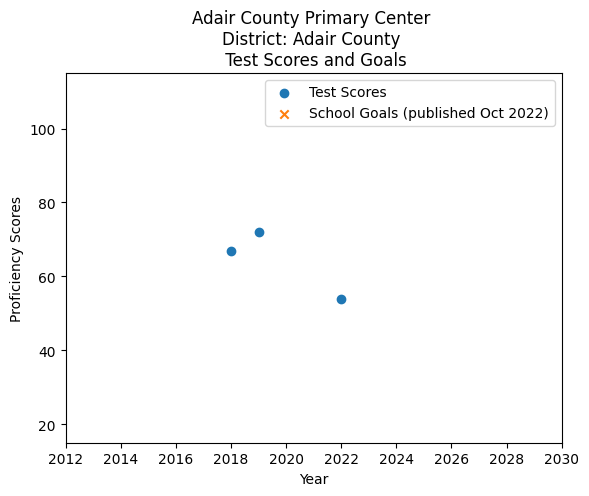

In [62]:
school_goals(3)

In [63]:
df_school_details.loc[5, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values


#df_school_details.loc[17, [2022]].values


array([50.0, 59.0, 70.0, 68.0, 71.0, 76.0, 75.0, 65.0], dtype=object)

In [64]:
def school_combin(school_index):
  # Test Trend - precovid
  x_trend = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
  y_trend = df_school_details.loc[school_index,[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]].values
  #y_trend = df_school_details.iloc[[school_index],4:12].values[0]
  sns.regplot(x = x_trend, y = y_trend, fit_reg=True, ci=None, marker="D")
  
  # Test Scores - scatter
  x_scores = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]
  y_scores = df_school_details.loc[school_index,[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022]].values
  plt.scatter(x_scores, y_scores)

  # Predict future scores
  x_pred = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
  slope = df_school_details.at[school_index, 'Proficiency slope']
  intercept = df_school_details.at[school_index, 'Proficiency intercept']
  y_pred = [slope * year + intercept for year in x_pred]
  plt.plot(x_pred, y_pred, linestyle='dashed')


  # Labels
  school = df_school_details.at[school_index, 'School']
  district = df_school_details.at[school_index, 'District']
  plt.xlim(2012, 2030)
  plt.ylim(15, 115)
  plt.xlabel('Year')
  plt.ylabel('Proficiency Scores')
  plt.title(("%s \n"%school)+ ("District: %s \n Test Trend and Predictions"%district))
  plt.gca().legend(('Test Trend (pre-covid)','Prediction Line', 'Test Scores'), loc='best')
  plt.show()

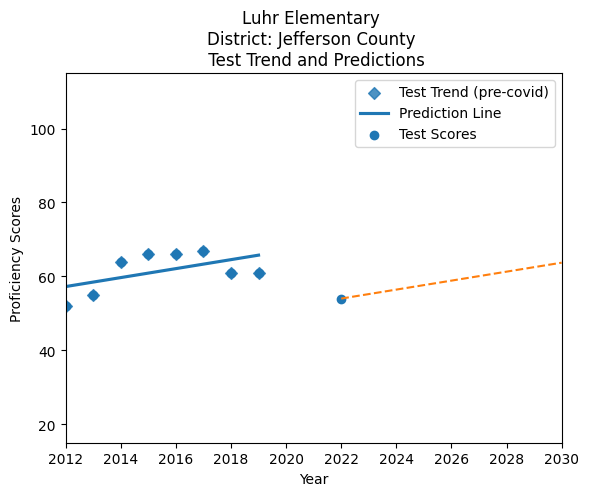

In [65]:
school_combin(654)

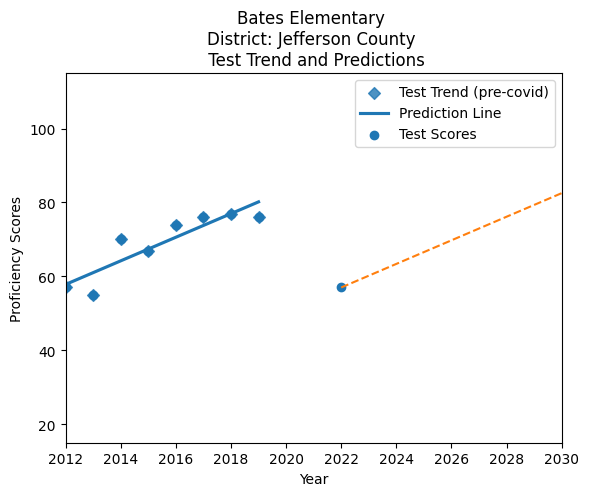

In [66]:
school_combin(581)

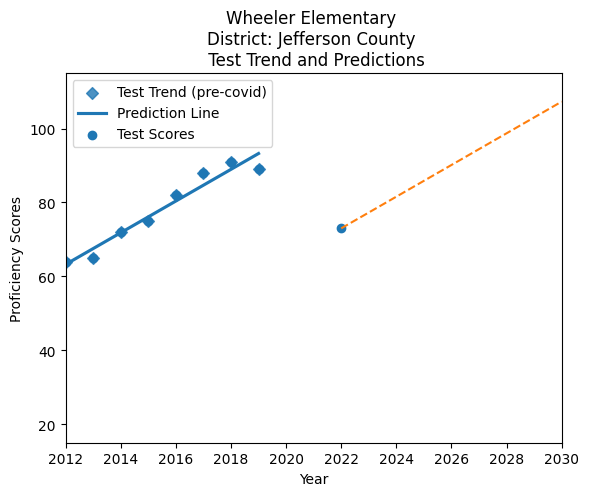

In [67]:
school_combin(704)

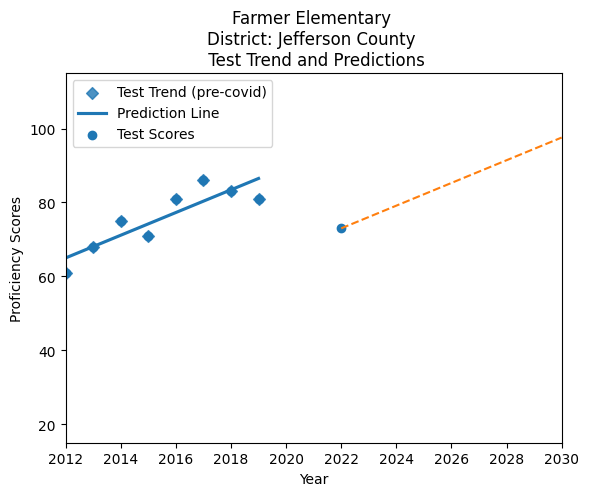

In [68]:
school_combin(612)

In [69]:
df_school_details[df_school_details['School'].str.contains("Newcomer")] 


,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept


In [70]:
df_school_details[df_school_details['School'].str.contains("Male")] 

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
652,275047,HS,Jefferson County,Louisville Male High,*Proficient,High,77.00,79.00,86.00,86.00,89.00,91.00,82.00,78.00,71.00,"8,880.00","625,680.00",340.00,"9,230.00",Title 1 Eligible - No Program,38.18,-85.72,55.00,57.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,0.48,-891.86


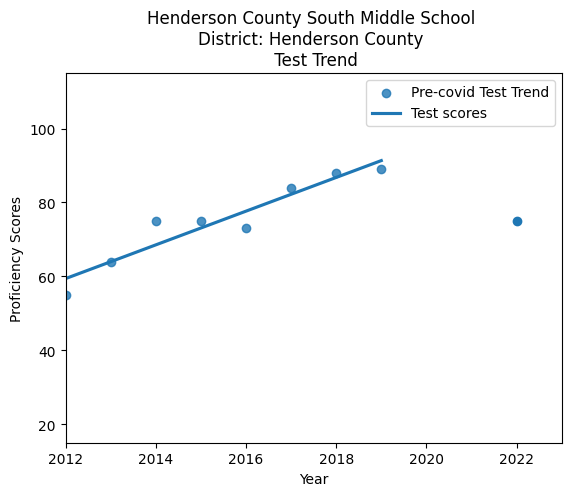

In [71]:
test_trend(539)

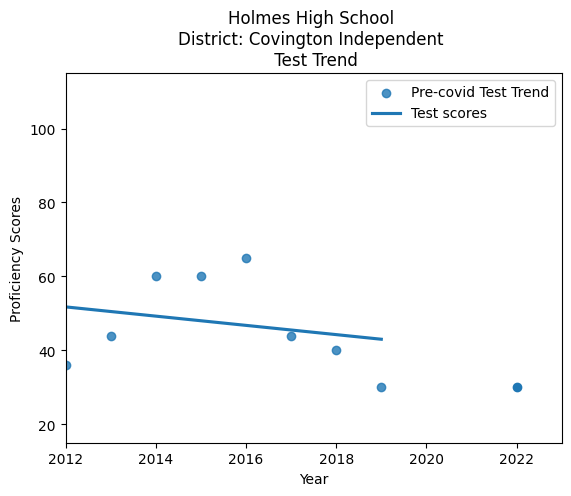

In [72]:
test_trend(249)

In [73]:
pd.options.display.max_rows = 150

In [74]:
jcps = df_school_details[df_school_details['District']=='Jefferson County'].sort_values('Reported Spending based on district teacher experience')

jcps_hs = jcps[jcps['Level']=='HS']

In [75]:
jcps_hs

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
652,275047,HS,Jefferson County,Louisville Male High,*Proficient,High,77.00,79.00,86.00,86.00,89.00,91.00,82.00,78.00,71.00,"8,880.00","625,680.00",340.00,"9,230.00",Title 1 Eligible - No Program,38.18,-85.72,55.00,57.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,0.48,-891.86
579,275105,HS,Jefferson County,Ballard High,*Needs Improvement,High,62.00,67.00,78.00,79.00,81.00,68.00,76.00,69.00,69.00,"9,640.00","619,380.00",330.00,"9,970.00",Title 1 Eligible - No Program,38.28,-85.62,49.00,51.00,53.00,56.00,58.00,61.00,63.00,66.00,68.00,0.79,"-1,519.71"
607,275007,HS,Jefferson County,Eastern High,*Needs Improvement,High,62.00,67.00,77.00,78.00,81.00,80.00,74.00,69.00,66.00,"9,640.00","595,800.00",300.00,"9,930.00",Title 1 Eligible - No Program,38.24,-85.53,54.00,56.00,58.00,60.00,62.00,65.00,67.00,69.00,71.00,1.14,"-2,244.86"
588,275045,HS,Jefferson County,Butler Traditional High,*Needs Improvement,Low,63.00,65.00,77.00,81.00,75.00,68.00,58.00,54.00,40.00,"9,810.00","372,610.00",220.00,"10,030.00",Title 1 Eligible - Schoolwide School,38.19,-85.82,37.00,40.00,43.00,46.00,49.00,52.00,55.00,58.00,61.00,-1.56,"3,193.36"
575,275018,HS,Jefferson County,Atherton High,*Distinguished,High,60.00,66.00,77.00,80.00,83.00,76.00,79.00,80.00,73.00,"10,400.00","563,120.00",420.00,"10,820.00",Title 1 Eligible - No Program,38.21,-85.69,54.00,56.00,58.00,60.00,63.00,65.00,67.00,69.00,71.00,2.44,"-4,861.64"
615,275012,HS,Jefferson County,Fern Creek High,*Needs Improvement,Low,50.00,56.00,71.00,72.00,74.00,61.00,41.00,40.00,44.00,"10,410.00","-287,380.00",-200.00,"10,210.00",Title 1 Eligible - Schoolwide School,38.16,-85.59,24.00,27.00,31.00,35.00,38.00,42.00,45.00,49.00,53.00,-2.06,"4,208.36"
655,275155,HS,Jefferson County,Marion C. Moore School,Needs Improvement,Very Low,43.00,49.00,63.00,67.00,67.00,45.00,32.00,31.00,33.00,"10,500.00","-500,660.00",-260.00,"10,240.00",Title 1 Eligible - Schoolwide School,38.14,-85.64,17.00,21.00,25.00,29.00,33.00,37.00,41.00,45.00,49.00,-2.65,"5,400.93"
710,275200,HS,Jefferson County,duPont Manual High,Distinguished,Very High,87.00,87.00,92.00,92.00,91.00,100.00,105.00,102.00,99.00,"10,780.00","1,037,600.00",550.00,"11,330.00",Not a Title 1 School,38.22,-85.76,83.00,83.00,84.00,85.00,86.00,87.00,88.00,88.00,89.00,2.60,"-5,148.57"
669,275075,HS,Jefferson County,Pleasure Ridge Park High,Needs Improvement,Very Low,52.00,53.00,65.00,66.00,72.00,51.00,44.00,41.00,34.00,"10,950.00","286,410.00",160.00,"11,120.00",Title 1 Eligible - Schoolwide School,38.15,-85.86,26.00,29.00,33.00,36.00,40.00,44.00,47.00,51.00,54.00,-1.88,"3,837.29"
633,275165,HS,Jefferson County,J. Graham Brown School,Distinguished,Very High,76.00,83.00,85.00,91.00,92.00,98.00,93.00,93.00,93.00,"11,850.00","377,820.00",530.00,"12,380.00",Not a Title 1 School,38.25,-85.75,74.00,75.00,76.00,78.00,79.00,80.00,81.00,83.00,84.00,2.49,"-4,937.93"


In [76]:
jcps_elementary = jcps[jcps['Level']=='ES'].sort_values(by=2022, ascending=False)

In [77]:
jcps_elementary

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
622,275013,ES,Jefferson County,Greathouse/Shryock Traditional,Distinguished,Very High,82.00,83.00,89.00,92.00,94.00,100.00,109.00,108.00,98.00,"9,520.00","160,160.00",270.00,"9,790.00",Not a Title 1 School,38.23,-85.62,88.00,89.00,89.00,90.00,90.00,91.00,91.00,92.00,93.00,4.13,"-8,254.79"
667,275096,ES,Jefferson County,Norton Elementary,Distinguished,Very High,73.00,69.00,79.00,80.00,85.00,96.00,98.00,101.00,92.00,"10,460.00","404,410.00",560.00,"11,020.00",Not a Title 1 School,38.30,-85.60,78.00,79.00,80.00,81.00,82.00,83.00,84.00,85.00,86.00,4.73,"-9,464.36"
653,275146,ES,Jefferson County,Lowe Elementary,Distinguished,Very High,77.00,66.00,81.00,83.00,79.00,98.00,93.00,95.00,85.00,"10,720.00","390,420.00",660.00,"11,370.00",Not a Title 1 School,38.25,-85.59,71.00,73.00,74.00,75.00,77.00,78.00,79.00,81.00,82.00,3.67,"-7,329.00"
687,275211,ES,Jefferson County,Stopher Elementary,Distinguished,Very High,74.00,78.00,82.00,81.00,78.00,95.00,94.00,94.00,82.00,"10,100.00","287,290.00",380.00,"10,490.00",Not a Title 1 School,38.27,-85.49,69.00,71.00,72.00,73.00,75.00,76.00,78.00,79.00,81.00,3.05,"-6,080.29"
632,275165,ES,Jefferson County,J. Graham Brown School,*Distinguished,High,64.00,62.00,76.00,83.00,87.00,98.00,100.00,99.00,76.00,"11,850.00","377,820.00",530.00,"12,380.00",NaN,NaN,NaN,71.00,73.00,74.00,75.00,77.00,78.00,80.00,81.00,82.00,6.01,"-12,080.07"
586,275260,ES,Jefferson County,Brandeis Elementary,*Distinguished,High,80.00,72.00,80.00,76.00,79.00,87.00,81.00,84.00,74.00,"11,070.00","99,340.00",190.00,"11,260.00",Title 1 Eligible - No Program,38.24,-85.80,63.00,65.00,66.00,68.00,70.00,72.00,74.00,75.00,77.00,1.15,"-2,260.93"
666,275371,ES,Jefferson County,Norton Commons Elementary,*Distinguished,High,NaN,NaN,NaN,NaN,NaN,83.00,86.00,87.00,74.00,"16,310.00","-72,130.00",-200.00,"16,120.00",Not a Title 1 School,38.33,-85.56,67.00,69.00,70.00,72.00,74.00,75.00,77.00,78.00,80.00,NaN,NaN
704,275109,ES,Jefferson County,Wheeler Elementary,*Proficient,High,64.00,65.00,72.00,75.00,82.00,88.00,91.00,89.00,73.00,"9,780.00","77,300.00",120.00,"9,900.00",Title 1 Eligible - No Program,38.17,-85.57,61.00,63.00,65.00,67.00,69.00,71.00,72.00,74.00,76.00,4.29,"-8,592.71"
693,275016,ES,Jefferson County,Tully Elementary,*Distinguished,High,61.00,62.00,75.00,77.00,78.00,86.00,88.00,88.00,73.00,"11,800.00","310,850.00",440.00,"12,230.00",Title 1 Eligible - No Program,38.20,-85.57,65.00,67.00,68.00,70.00,72.00,73.00,75.00,77.00,78.00,4.20,"-8,424.21"
612,275212,ES,Jefferson County,Farmer Elementary,*Distinguished,High,61.00,68.00,75.00,71.00,81.00,86.00,83.00,81.00,73.00,"10,670.00","284,500.00",390.00,"11,060.00",Title 1 Eligible - No Program,38.15,-85.55,61.00,63.00,65.00,66.00,68.00,70.00,72.00,74.00,76.00,3.07,"-6,137.43"


In [78]:
df_school_details[df_school_details['School'].str.contains("Atherton")] 

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
575,275018,HS,Jefferson County,Atherton High,*Distinguished,High,60.00,66.00,77.00,80.00,83.00,76.00,79.00,80.00,73.00,"10,400.00","563,120.00",420.00,"10,820.00",Title 1 Eligible - No Program,38.21,-85.69,54.00,56.00,58.00,60.00,63.00,65.00,67.00,69.00,71.00,2.44,"-4,861.64"


In [79]:
df_school_details[df_school_details['School'].str.contains("Fern Creek High")] 

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
615,275012,HS,Jefferson County,Fern Creek High,*Needs Improvement,Low,50.00,56.00,71.00,72.00,74.00,61.00,41.00,40.00,44.00,"10,410.00","-287,380.00",-200.00,"10,210.00",Title 1 Eligible - Schoolwide School,38.16,-85.59,24.00,27.00,31.00,35.00,38.00,42.00,45.00,49.00,53.00,-2.06,"4,208.36"


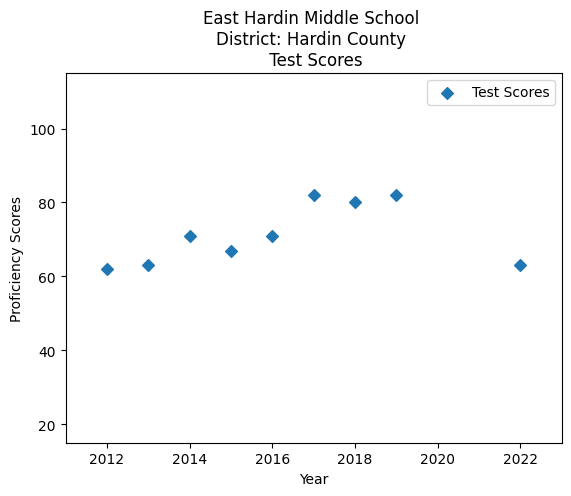

In [80]:
test_scores(477)

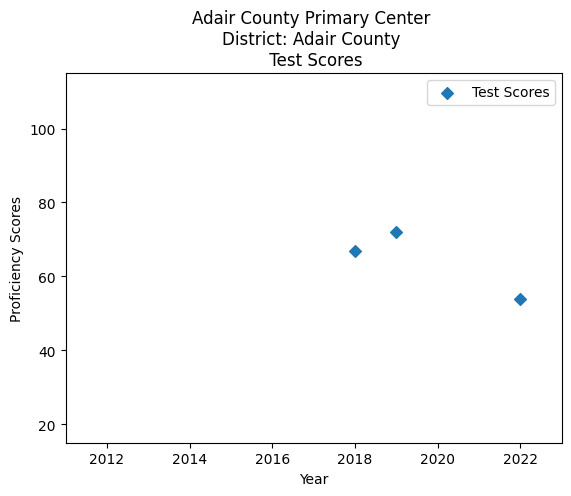

In [81]:
test_scores(3)

In [82]:
df_school_details[df_school_details.isnull().any(axis=1)]

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6010,ES,Anchorage Independent,Anchorage Independent Public School,Distinguished,Very High,71.00,81.00,85.00,79.00,85.00,96.00,103.00,105.00,98.00,"19,950.00","123,650.00",340.00,"20,280.00",NaN,NaN,NaN,83.00,84.00,85.00,86.00,86.00,87.00,88.00,89.00,90.00,4.61,"-9,217.64"
22,13011,ES,Augusta Independent,Augusta Independent School,*Needs Improvement,Low,46.00,58.00,60.00,65.00,73.00,73.00,58.00,62.00,33.00,"10,850.00","13,200.00",50.00,"10,900.00",NaN,NaN,NaN,35.00,38.00,41.00,44.00,47.00,50.00,54.00,57.00,60.00,1.89,"-3,794.36"
24,13011,MS,Augusta Independent,Augusta Independent School,*Needs Improvement,Low,47.00,46.00,62.00,63.00,58.00,52.00,54.00,54.00,52.00,"10,850.00","13,200.00",50.00,"10,900.00",NaN,NaN,NaN,27.00,31.00,34.00,38.00,41.00,45.00,48.00,51.00,55.00,0.64,"-1,247.86"
28,16011,ES,Barbourville Independent,Barbourville City School,*Needs Improvement,Medium,45.00,44.00,62.00,58.00,66.00,73.00,74.00,78.00,61.00,"8,310.00","-9,170.00",-10.00,"8,290.00",NaN,NaN,NaN,61.00,62.00,64.00,66.00,68.00,70.00,72.00,74.00,76.00,5.02,"-10,097.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,585090,MS,Webster County,Sebree Elementary School,Needs Improvement,*Very Low,48.00,50.00,56.00,NaN,NaN,NaN,NaN,NaN,NaN,"7,000.00","34,610.00",90.00,"7,100.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1261,585125,MS,Webster County,Webster County Middle School,*Needs Improvement,Low,NaN,NaN,NaN,62.00,58.00,61.00,66.00,65.00,54.00,"6,270.00","33,400.00",100.00,"6,360.00",Title 1 Eligible - No Program,37.50,-87.71,36.00,39.00,42.00,45.00,48.00,51.00,54.00,57.00,60.00,NaN,NaN
1266,591365,ES,Whitley County,Whitley County Central Primary School,*Distinguished,High,NaN,NaN,NaN,NaN,NaN,NaN,95.00,91.00,79.00,"14,060.00","-22,100.00",-60.00,"14,000.00",Title 1 Eligible - Schoolwide School,36.78,-84.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1271,592012,ES,Williamsburg Independent,Williamsburg City School,*Needs Improvement,Medium,62.00,62.00,52.00,65.00,64.00,69.00,63.00,69.00,55.00,"12,240.00","62,760.00",80.00,"12,330.00",NaN,NaN,NaN,41.00,43.00,46.00,49.00,52.00,55.00,58.00,60.00,63.00,1.24,"-2,448.43"


In [83]:
df_school_details

,School Code,Level,District,School,Classification,Rating,2012,2013,2014,2015,2016,2017,2018,2019,2022,Reported Spending based on district teacher experience,Money Difference per school,Money Difference per student,Estimated Spending based on school teacher experience,Title I Status,Latitude,Longitude,2022 Goal,2023 Goal,2024 Goal,2025 Goal,2026 Goal,2027 Goal,2028 Goal,2029 Goal,2030 Goal,Proficiency slope,Proficiency intercept
0,1016,ES,Adair County,Adair County Elementary School,*Needs Improvement,Low,63.00,63.00,63.00,60.00,69.00,71.00,67.00,72.00,54.00,"9,620.00",640.00,0.00,"9,620.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,48.00,50.00,53.00,55.00,58.00,60.00,63.00,65.00,68.00,1.38,"-2,738.29"
1,1010,HS,Adair County,Adair County High School,*Needs Improvement,Medium,55.00,54.00,69.00,71.00,72.00,60.00,57.00,58.00,54.00,"9,360.00","-12,790.00",-20.00,"9,340.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,41.00,44.00,46.00,49.00,52.00,55.00,58.00,61.00,63.00,0.12,-186.71
2,1014,MS,Adair County,Adair County Middle School,*Needs Improvement,Medium,48.00,53.00,62.00,63.00,68.00,65.00,73.00,78.00,61.00,"8,620.00","-8,210.00",-20.00,"8,600.00",Title 1 Eligible - Schoolwide School,37.10,-85.32,45.00,47.00,50.00,52.00,55.00,58.00,60.00,63.00,66.00,3.86,"-7,738.14"
3,1020,ES,Adair County,Adair County Primary Center,*Needs Improvement,Low,NaN,NaN,NaN,NaN,NaN,NaN,67.00,72.00,54.00,"12,950.00","22,300.00",40.00,"12,990.00",Title 1 Eligible - Schoolwide School,37.11,-85.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5060,ES,Allen County,Allen County Intermediate Center,*Needs Improvement,Low,56.00,58.00,63.00,70.00,71.00,72.00,71.00,75.00,52.00,"10,990.00","82,060.00",120.00,"11,110.00",Title 1 Eligible - Schoolwide School,36.75,-86.22,45.00,48.00,50.00,53.00,56.00,58.00,61.00,63.00,66.00,2.69,"-5,388.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,601090,ES,Woodford County,Huntertown Elementary School,*Distinguished,High,65.00,60.00,77.00,76.00,80.00,90.00,86.00,77.00,77.00,"10,850.00","115,620.00",250.00,"11,090.00",Title 1 Eligible - Schoolwide School,38.04,-84.71,56.00,58.00,61.00,63.00,65.00,67.00,69.00,71.00,73.00,3.06,"-6,109.36"
1283,601120,ES,Woodford County,Northside Elementary School,*Needs Improvement,Medium,64.00,63.00,71.00,70.00,60.00,75.00,73.00,82.00,69.00,"12,170.00","47,890.00",150.00,"12,320.00",Title 1 Eligible - Schoolwide School,38.15,-84.68,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,74.00,2.12,"-4,215.71"
1284,601075,ES,Woodford County,Simmons Elementary School,*Needs Improvement,Medium,54.00,55.00,68.00,64.00,71.00,76.00,80.00,77.00,70.00,"12,060.00","-14,650.00",-30.00,"12,030.00",Title 1 Eligible - Schoolwide School,38.05,-84.75,53.00,55.00,57.00,59.00,62.00,64.00,66.00,68.00,71.00,3.77,"-7,560.64"
1285,601050,ES,Woodford County,Southside Elementary School,*Distinguished,High,62.00,67.00,78.00,78.00,74.00,82.00,79.00,79.00,75.00,"10,720.00","70,760.00",140.00,"10,860.00",Title 1 Eligible - Schoolwide School,38.04,-84.72,56.00,58.00,60.00,62.00,64.00,66.00,68.00,70.00,72.00,2.23,"-4,426.36"


In [84]:
df_school_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   School Code                                             1287 non-null   int64  
 1   Level                                                   1287 non-null   object 
 2   District                                                1287 non-null   object 
 3   School                                                  1287 non-null   object 
 4   Classification                                          1266 non-null   object 
 5   Rating                                                  1287 non-null   object 
 6   2012                                                    1180 non-null   float64
 7   2013                                                    1183 non-null   float64
 8   2014                                  

# Aggregate District Data

In [85]:
agg_district_data = predict_df.groupby(['District']).agg({'Proficiency Rate': ['mean', 'min', 'max'],
                                      'Reported Spending per student': ['mean'],
                                      'Money Difference per school': ['min', 'max']
                                       })

agg_district_data.columns = ['Average Proficiency Score', 
                             'Minimum Proficiency Score',
                             'Maximum Proficiency Score',
                             'Average Reported Spending (per student)',
                             'Minimum Money Difference (estimated)',
                             'Maximum Money Difference (estimated)']

agg_district_data.reset_index(drop=False, inplace=True)

In [86]:
agg_district_data.iloc[85:95,:]

,District,Average Proficiency Score,Minimum Proficiency Score,Maximum Proficiency Score,Average Reported Spending (per student),Minimum Money Difference (estimated),Maximum Money Difference (estimated)
85,Jefferson County,58.40,10.00,109.00,"12,234.37","-666,200.00","1,497,800.00"
86,Jenkins Independent,57.48,31.00,77.00,"13,308.33","-10,000.00","130,400.00"
87,Jessamine County,66.17,46.00,79.00,"9,708.28","-87,300.00","206,100.00"
88,Johnson County,71.43,49.00,97.00,"9,560.18","-33,300.00","78,900.00"
89,Kenton County,72.29,51.00,91.00,"9,121.22","-240,000.00","135,600.00"
90,Knott County,62.12,22.00,84.00,"11,094.73","-79,200.00","109,200.00"
91,Knox County,61.76,37.00,93.00,"11,837.82","-296,300.00","89,400.00"
92,LaRue County,70.53,59.00,82.00,"9,132.50","-88,800.00","52,000.00"
93,Laurel County,75.28,49.00,101.00,"8,681.13","-207,400.00","64,200.00"
94,Lawrence County,60.09,42.00,76.00,"12,774.84","-52,400.00","111,400.00"


In [87]:
agg_district_data_by_year = predict_df.groupby(['District', 'End Year']).agg({'Proficiency Rate': ['mean', 'min', 'max'],
                                      'Reported Spending per student': ['mean'],
                                      'Money Difference per school': ['min', 'max']
                                       })

agg_district_data_by_year.columns = ['Average Proficiency Score', 
                             'Minimum Proficiency Score',
                             'Maximum Proficiency Score',
                             'Average Reported Spending (per student)',
                             'Minimum Money Difference (estimated)',
                             'Maximum Money Difference (estimated)']

agg_district_data_by_year.reset_index(drop=False, inplace=True)

In [88]:
agg_district_data_by_year

,District,End Year,Average Proficiency Score,Minimum Proficiency Score,Maximum Proficiency Score,Average Reported Spending (per student),Minimum Money Difference (estimated),Maximum Money Difference (estimated)
0,Adair County,2012,55.33,48.00,63.00,"6,813.33","-55,700.00","-33,800.00"
1,Adair County,2013,56.67,53.00,63.00,"6,830.00","-37,000.00","-21,200.00"
2,Adair County,2014,64.67,62.00,69.00,"6,946.67","-13,100.00","-11,300.00"
3,Adair County,2015,64.67,60.00,71.00,"9,400.00","-42,100.00","24,800.00"
4,Adair County,2016,69.67,68.00,72.00,"9,900.00","-19,200.00","38,300.00"
...,...,...,...,...,...,...,...,...
1521,Woodford County,2016,73.20,60.00,81.00,"10,880.00","28,600.00","173,200.00"
1522,Woodford County,2017,81.00,75.00,90.00,"10,372.00","4,800.00","161,700.00"
1523,Woodford County,2018,77.40,69.00,86.00,"12,762.00","8,300.00","80,800.00"
1524,Woodford County,2019,77.20,71.00,82.00,"11,334.00","6,600.00","74,600.00"
